In [21]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

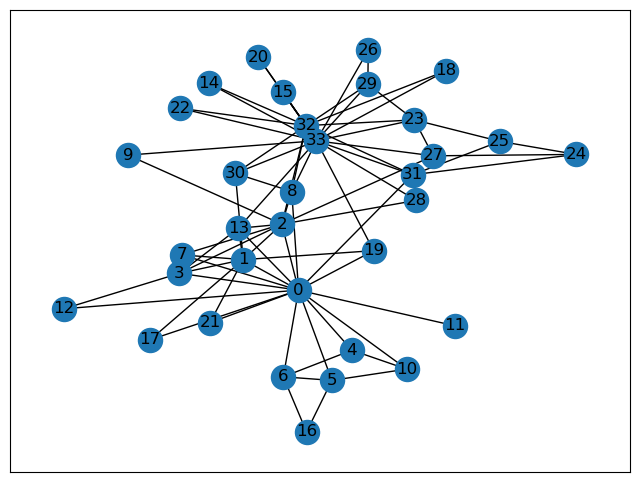

In [22]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [33]:
# g.nodes()
g.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [32]:
for node in g.nodes :
    print(node, type(g.nodes[node]), g.nodes[node].keys())

0 <class 'dict'> dict_keys(['club'])
1 <class 'dict'> dict_keys(['club'])
2 <class 'dict'> dict_keys(['club'])
3 <class 'dict'> dict_keys(['club'])
4 <class 'dict'> dict_keys(['club'])
5 <class 'dict'> dict_keys(['club'])
6 <class 'dict'> dict_keys(['club'])
7 <class 'dict'> dict_keys(['club'])
8 <class 'dict'> dict_keys(['club'])
9 <class 'dict'> dict_keys(['club'])
10 <class 'dict'> dict_keys(['club'])
11 <class 'dict'> dict_keys(['club'])
12 <class 'dict'> dict_keys(['club'])
13 <class 'dict'> dict_keys(['club'])
14 <class 'dict'> dict_keys(['club'])
15 <class 'dict'> dict_keys(['club'])
16 <class 'dict'> dict_keys(['club'])
17 <class 'dict'> dict_keys(['club'])
18 <class 'dict'> dict_keys(['club'])
19 <class 'dict'> dict_keys(['club'])
20 <class 'dict'> dict_keys(['club'])
21 <class 'dict'> dict_keys(['club'])
22 <class 'dict'> dict_keys(['club'])
23 <class 'dict'> dict_keys(['club'])
24 <class 'dict'> dict_keys(['club'])
25 <class 'dict'> dict_keys(['club'])
26 <class 'dict'> dict

In [26]:
nodes = [{'name': str(i), 'club': g.nodes[i]['club']} for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]} for u in g.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links},
              f, indent=4,)

In [27]:
nodes

[{'name': '0', 'club': 'Mr. Hi'},
 {'name': '1', 'club': 'Mr. Hi'},
 {'name': '2', 'club': 'Mr. Hi'},
 {'name': '3', 'club': 'Mr. Hi'},
 {'name': '4', 'club': 'Mr. Hi'},
 {'name': '5', 'club': 'Mr. Hi'},
 {'name': '6', 'club': 'Mr. Hi'},
 {'name': '7', 'club': 'Mr. Hi'},
 {'name': '8', 'club': 'Mr. Hi'},
 {'name': '9', 'club': 'Officer'},
 {'name': '10', 'club': 'Mr. Hi'},
 {'name': '11', 'club': 'Mr. Hi'},
 {'name': '12', 'club': 'Mr. Hi'},
 {'name': '13', 'club': 'Mr. Hi'},
 {'name': '14', 'club': 'Officer'},
 {'name': '15', 'club': 'Officer'},
 {'name': '16', 'club': 'Mr. Hi'},
 {'name': '17', 'club': 'Mr. Hi'},
 {'name': '18', 'club': 'Officer'},
 {'name': '19', 'club': 'Mr. Hi'},
 {'name': '20', 'club': 'Officer'},
 {'name': '21', 'club': 'Mr. Hi'},
 {'name': '22', 'club': 'Officer'},
 {'name': '23', 'club': 'Officer'},
 {'name': '24', 'club': 'Officer'},
 {'name': '25', 'club': 'Officer'},
 {'name': '26', 'club': 'Officer'},
 {'name': '27', 'club': 'Officer'},
 {'name': '28', 'cl

In [19]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [20]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 600, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>